<a href="https://colab.research.google.com/github/JairEsc/Mat_Apl/blob/main/MN_T12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [ ]:
#Factorizacion QR
def QR(A):
    n=len(A);
    Q=np.zeros((n,n))
    R=np.zeros((n,n))
    R[0,0]=np.linalg.norm(A[:,0])
    Q[:,0]=A[:,0]/np.linalg.norm(A[:,0])
    # A_k=r_{1l}*q_1+\cdots+ r_{kk}*q_{k} entonces r_{ik}=q_{i} \cdot a_{k}
    #q_{k}=(a_k-\sum^{k-1} r_{ik}*q_{i})/norma.
    for k in range(1,n):
        a_star=np.array(A[:,k])
        for i in range(k):
            R[i,k]=np.dot(Q[:,i],A[:,k])
            a_star=np.subtract(a_star,R[i,k]*Q[:,i])
        Q[:,k]=a_star/np.linalg.norm(a_star)
        R[k,k]=np.linalg.norm(a_star)
    return(Q,R)
def check_diag(A,tol):#Pensado para matrices en general (NO simetricas)
    boolean=True
    breaker=False
    for i in range(len(A)):
        for j in range(i,len(A)):
            if(i!=j):
                if(abs(A[i][j])>tol):
                    boolean=False;
                    breaker=True;
                    break;
        if(breaker==True):
            break
    return(boolean)

In [ ]:
def QR_iteration(A,tol=10**(-6),max_iter=10,pr=True):
    Q,R=QR(A)
    A=np.dot(R,Q)
    count=1
    phi=Q
    while(check_diag(A,tol)==False & (count<max_iter)):
        count+=1
        Q,R=QR(A)
        phi=np.dot(phi,Q)
        A=np.dot(R,Q)
    if(count==max_iter):
        print("max iter")
    else:
        if(pr==True):
            print("Numero de iteraciones: ", count)
    return [phi,np.diag(A)]

In [ ]:
A=np.loadtxt("Eigen_3.txt",skiprows=1)
Q,D=QR_iteration(A)
print("Verificacion ||A*Q-Q*D||/||A*Q||: ", np.linalg.norm(np.dot(A,Q)-np.dot(Q,np.diag(D)))/np.linalg.norm(np.dot(A,Q)))
print("Aproximacion eigenvalores :", D)

Numero de iteraciones:  27
Verificacion ||A*Q-Q*D||/||A*Q||:  2.69959113696392e-07
Aproximacion eigenvalores : [3.61363835 0.71955586 0.47466129]


In [ ]:
A=np.loadtxt("Eigen_25.txt",skiprows=1)
Q,D=QR_iteration(A)
print("Verificacion ||A*Q-Q*D||/||A*Q||: ", np.linalg.norm(np.dot(A,Q)-np.dot(Q,np.diag(D)))/np.linalg.norm(np.dot(A,Q)))
print("Aproximacion eigenvalores :", D)

Numero de iteraciones:  622
Verificacion ||A*Q-Q*D||/||A*Q||:  5.5200834473455166e-08
Aproximacion eigenvalores : [25.46861213  0.98974483  0.96053995  0.88936694  0.81472991  0.74310482
  0.69349945  0.64214197  0.58616015  0.54030573  0.50133635  0.43696989
  0.43145426  0.42294509  0.40492083  0.3823956   0.35823032  0.31768207
  0.29515689  0.23867958  0.19043193  0.13367051  0.09655695  0.06109875
  0.03698549]


In [2]:
import numpy as np

In [3]:
def gen_bandada_3(h):#Recibe el vector h del algoritmo.
    H=np.zeros((len(h)+1,len(h)+1))
    for i in range(len(h)+1):
        if i==0:
            H[i,i]=1
        else:
            if i==len(h):
                H[i,i]=1
            else:
                H[i,i-1]=h[i-1]
                H[i,i]=2*(h[i]+h[i-1])
                H[i,i+1]=h[i]
    return H

In [4]:
def eliminacion_gaussiana(matriz,b):
  for d in range(len(matriz)):
    if(matriz[d][d]==0): return "un cero apareció"
    for i in range(d+1,len(matriz)):
      aux=(matriz[i][d]/matriz[d][d])
      for j in range(d,len(matriz)):
        matriz[i][j]+=-matriz[d][j]*(aux)
      b[i]+=-b[d]*(aux)
  return superior(matriz,b)

In [5]:
def superior(list,b):
  n=len(list)
  X=[b[n-1]/list[n-1][n-1]]
  X_inv=[X[0]]
  for i in range(1,n):#len(list) es el número de renglones de la matriz
    acum=0
    for j in range(i):#0<=j<=i-1 
      acum+=X[j]*list[n-i-1][n-1-j]
    X.append((b[n-1-i]-acum)/list[n-1-i][n-1-i])
    X_inv.insert(0,X[i])
  return X_inv

In [ ]:
gen_bandada_3([2,3,3,4])

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 2., 10.,  3.,  0.,  0.],
       [ 0.,  3., 12.,  3.,  0.],
       [ 0.,  0.,  3., 14.,  4.],
       [ 0.,  0.,  0.,  0.,  1.]])

In [6]:
def spline_cubico_extramos_libres(x,y):
    a=y
    h=x[1:]-x[0:-1]
    g=np.zeros(len(a))
    for i in range(1,len(a)-1):
        g[i]=3*(a[i+1]-a[i])/h[i]-3*(a[i]-a[i-1])/h[i-1]
    c=np.zeros(len(a))
    H=gen_bandada_3(h)
    c=eliminacion_gaussiana(H,g)
    b=np.zeros(len(a)-1)
    d=np.zeros(len(a)-1)
    for i in range(0,len(a)-1):
        b[i]=((a[i+1]-a[i])/h[i])-((c[i+1]+2*c[i])*h[i])/3
        d[i]=(c[i+1]-c[i])/(3*h[i])
    return [a,b,c,d]

In [ ]:
x=np.array([2,6,7,12])
y=np.array([4,4,6,7])
spline_cubico_extramos_libres(x,y)

[array([4, 4, 6, 7]),
 array([-0.86722689,  1.73445378,  1.88067227]),
 [0.0, 0.6504201680672269, -0.5042016806722689, 0.0],
 array([ 0.05420168, -0.38487395,  0.03361345])]

In [7]:
import matplotlib.pyplot as plt
def spline(x,a,b,c,d,x_0):
    return (d*(x-x_0)**3+c*(x-x_0)**2+b*(x-x_0)+a)

In [8]:
v_spline = np.vectorize(spline)

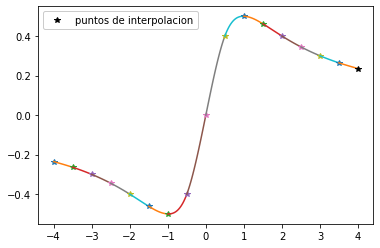

In [ ]:
#Ejercicio.
def f(x):
    return (x/(1+x**2))
x=np.zeros(17)
y=np.zeros(17)
for i in range(0,17):
    x[i]=(i-8)/2
    y[i]=f(x[i])
a,b,c,d=spline_cubico_extramos_libres(x,y)

for i in range(len(a)-1):
    x_0=x[i]
    plt.plot(x_0,y[i],'*')
    x_s=np.linspace(x_0,x[i+1],20)
    plt.plot(x_s,v_spline(x_s,a[i],b[i],c[i],d[i],x_0=x_0))
plt.plot(x[len(x)-1],y[len(y)-1],'k*',label='puntos de interpolacion')
plt.legend(framealpha=1, frameon=True);

In [12]:
t=np.zeros(25)
x_s=np.zeros(25)
y_s=np.zeros(25)
def x(t):
    return (r(t)*np.sin(t))
def y(t):
    return (r(t)*np.cos(t))
def r(t):
    return (np.exp(np.cos(t))-2*np.cos(4*t)+(np.sin(t/12))**5)
for i in range(25):
    t[i]=np.pi*i/12
    x_s[i]=x(t[i])
    y_s[i]=y(t[i])
a1,b1,c1,d1=spline_cubico_extramos_libres(t,x_s)
a2,b2,c2,d2=spline_cubico_extramos_libres(t,y_s)
plt.plot(a,b)

NameError: ignored